Suppose a web site hosts large video file F that anyone can download.  Browsers who download the file need to make sure the file is authentic before displaying the content to the user.  One approach is to have the web site hash the contents of F using a collision resistant hash and then distribute the resulting short hash value h=H(F) to users via some authenticated channel (later on we will use digital signatures for this). Browsers would download the entire file F, check that H(F) is equal to the authentic hash value h and if so, display the video to the user. Unfortunately, this means that the video will only begin playing after the *entire* file F has been downloaded. 

Our goal in this project is to build a file authentication system that lets browsers authenticate and play video chunks as they are downloaded without having to wait for the entire file. Instead of computing a hash of the entire file, the web site breaks the file into 1KB blocks (1024 bytes).  It computes the hash of the last block and appends the value to the second to last block.  It then computes the hash of this augmented second to last block and appends the resulting hash to the third block from the end.   This process continues from the last block to the first as in the following diagram:

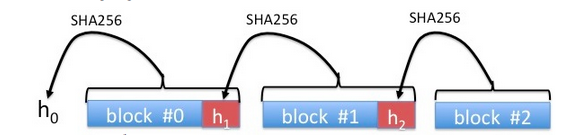

The final hash value h0 – a hash of the first block with its appended hash – is distributed to users via the authenticated channel as above.

Now, a browser downloads the file F one block at a time, where each block includes the appended hash value from the diagram above. When the first block (B0 ∥ h1) is received the browser checks that H(B0 ∥ h1) is equal to h0 and if so it begins playing the first video block. When the second block (B1 ∥ h2) is received the browser checks that H(B1 ∥ h2) is equal to h1 and if so it plays this second block. This process continues until the very last block.   This way each block is authenticated and played as it is received and there is no need to wait until the entire file is downloaded.

It is not difficult to argue that if the hash function H is collision resistant then an attacker cannot modify any of the video blocks without being detected by the browser.  Indeed, since h0 = H(B0 ∥ h1) an attacker cannot find a pair (B0′, h1′)≠(B0, h1) such that h0 = H(B0' ∥ h1') since this would break collision resistance of H.  Therefore after the first hash check the browser is convinced that both B0 and h1 are authentic.  Exactly the same argument proves that after the second hash check the browser is convinced that both B1 and h2	are authentic, and so on for the remaining blocks.

In this project we will be using SHA256 as the hash function.  For an implementation of SHA256 use an existing crypto library such as PyCrypto (Python), Crypto++ (C++), or any other.

When appending the hash value to each block, please append it as binary data, that is, as 32 unencoded bytes (which is 256 bits).  If the file size is not a multiple of 1KB then the very last block will be shorter than 1KB, but all other blocks will be exactly 1KB.

Your task is to write code to compute the hash h0 of a given file F and to verify blocks of F as they are received by the client.

In the box below please enter the (hex encoded) hash h0 for this video file.

You can check your code by using it to hash a different file.   In particular, the hex encoded h0 for this video file is:
03c08f4ee0b576fe319338139c045c89c3e8e9409633bea29442e21425006ea8

In [61]:
## read the video file
## store in an array for each with 1024 bytes
byte_data = []

## read by binary ('rb')
with open('6.1.intro.mp4_download', 'rb') as f:
    while True:
        chunk = f.read(1024)  # read 1024 bytes every time
        if not chunk:
            break
        byte_data.append(chunk)

In [72]:
# -*- coding: utf-8 -*-

## use hashlib package to construct SHA-256
import hashlib

def get_h0(byte_data):
    
    ## hash the file data from the last to beginning
    for i in range(-1, -(len(byte_data)+1), -1):
        
        h = hashlib.sha256()
        h.update(byte_data[i])
        ## expand the data with previous hash (except the last data)
        if i != -1:
            h.update(h0)
        ## input of hashlib should be 'bytes', hence digest as 'byte'
        byte_hash = h.digest()
        
        h0 = byte_hash
    
    ## convert byte to hex
    return h0.hex()

In [73]:
h0 = get_h0(byte_data)
print(h0)

5b96aece304a1422224f9a41b228416028f9ba26b0d1058f400200f06a589949


## check

In [74]:
byte_data_check = []
with open('6.2.birthday.mp4_download', 'rb') as f:
    while True:
        chunk = f.read(1024)
        if not chunk:
            break
        byte_data_check.append(chunk)

In [75]:
h0_check = get_h0(byte_data_check)
print(h0_check)

03c08f4ee0b576fe319338139c045c89c3e8e9409633bea29442e21425006ea8


In [ ]:
## 03c08f4ee0b576fe319338139c045c89c3e8e9409633bea29442e21425006ea8
## check if the result is same as above